In [1]:
import warnings
warnings.filterwarnings('ignore')

from sigpyproc.readers import FilReader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import dates
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
from datetime import datetime, timedelta
import astropy.units as u
from astropy.time import Time
from astropy.visualization import ImageNormalize, PercentileInterval

plt.rcParams['figure.dpi'] = 100 #sets default resolution for displayed figures (pixel density)
plt.rcParams['savefig.dpi'] = 300 #sets default res for saved figs - note it's higher
plt.rcParams['figure.facecolor'] = 'white' #sets default background colour of displayed figures to white
plt.rcParams['savefig.facecolor'] = 'white' # ,, saved figs ,,

# print(plt.get_backend())
#path = '/home/mnedal/data/ilofar'

In [2]:
stokes = 'I'
#filename = f'{path}/realta_ilofar_stokes{stokes}_20240514T1635.fil'
filename = f'/Users/catherinecuddy/Desktop/Realta/2024-05-14T1635.fil'

In [3]:
a = FilReader(filename) # header
header = a.header.to_dict() #file headers are put in a dictionary

In [4]:
[x for x in dir(a) if not x.startswith('_')] #returns headers that don't start with _

['apply_channel_mask',
 'bandpass',
 'bitsinfo',
 'chan_stats',
 'chan_stride',
 'clean_rfi',
 'collapse',
 'compute_stats',
 'compute_stats_basic',
 'dedisperse',
 'downsample',
 'extract_bands',
 'extract_chans',
 'extract_samps',
 'filename',
 'fold',
 'header',
 'invert_freq',
 'logger',
 'read_block',
 'read_chan',
 'read_dedisp_block',
 'read_plan',
 'remove_zerodm',
 'requantize',
 'samp_stride',
 'subband']

In [6]:
header

{'filename': '/Users/catherinecuddy/Desktop/Realta/2024-05-14T1635.fil',
 'data_type': 'filterbank',
 'nchans': 488,
 'foff': -0.1953125,
 'fch1': 200.0,
 'nbits': 32,
 'tsamp': 0.00131072,
 'tstart': 60444.690972213044,
 'nsamples': 3204346,
 'nifs': 1,
 'coord': <SkyCoord (ICRS): (ra, dec) in deg
     (0., 0.)>,
 'azimuth': <Angle 235.90465428 deg>,
 'zenith': <Angle 133.53284027 deg>,
 'telescope': 'MeerKAT',
 'backend': 'FAKE',
 'source': 'Sun357',
 'frame': 'topocentric',
 'ibeam': 0,
 'nbeams': 0,
 'dm': 0,
 'period': 0,
 'accel': 0,
 'signed': False,
 'rawdatafile': 'unknown',
 'stream_info': {'entries': [{'filename': '/Users/catherinecuddy/Desktop/Realta/2024-05-14T1635.fil',
    'hdrlen': 347,
    'datalen': 6254883392,
    'nsamples': 3204346,
    'tstart': 60444.690972213044,
    'tsamp': 0.00131072}]},
 'basename': '2024-05-14T1635',
 'extension': '.fil',
 'telescope_id': 64,
 'machine_id': 0,
 'bandwidth': 95.3125,
 'ftop': 200.09765625,
 'fbottom': 104.78515625,
 'fcenter

In [7]:
# filename = f'{path}/Sun357_20240514_stokesI.fil'
# a = FilReader(filename) # header
# header = a.header.to_dict()
# header

In [8]:
tstart_obs_str = Time(a.header.tstart, format='mjd').iso #tstart header tells the start time - needs to be converted to this format
n_samples = a.header.nsamples
print(tstart_obs_str, n_samples, sep='\n')

2024-05-14 16:34:59.999
3204346


In [9]:
data = a.read_block(start=0, nsamps=n_samples)

In [10]:
print(data.shape)

(488, 3204346)


In [11]:
# making time axis
tstart = Time(data.header.tstart, format='mjd')                    # tstart.iso will tell the time in format yyyy-mm-dd hh:mm:ss
tarray = tstart + (np.arange(data.shape[1])*data.header.tsamp*u.s) # making the time array for realta time resolution
print(len(tarray), tarray[0].iso, tarray[-1].iso, sep='\n')

3204346
2024-05-14 16:34:59.999
2024-05-14 17:44:59.998


In [12]:
dt = datetime.strptime(tarray[1].iso, '%Y-%m-%d %H:%M:%S.%f') - datetime.strptime(tarray[0].iso, '%Y-%m-%d %H:%M:%S.%f') #finds dt between 1st and 2nd timestamps
print('Time cadence:', dt.total_seconds()*1000, 'ms.')

Time cadence: 2.0 ms.


In [13]:
tarray

<Time object: scale='utc' format='mjd' value=[60444.69097221 60444.69097223 60444.69097224 ... 60444.73958328
 60444.7395833  60444.73958331]>

In [14]:
# Converting the array to datetime object
Tarray = [datetime.strptime(t.iso, '%Y-%m-%d %H:%M:%S.%f') for t in tarray]
print(Tarray[0], Tarray[-1], sep='\n')

2024-05-14 16:34:59.999000
2024-05-14 17:44:59.998000


In [15]:
Tarray

[datetime.datetime(2024, 5, 14, 16, 34, 59, 999000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 1000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 2000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 3000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 4000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 6000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 7000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 8000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 10000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 11000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 12000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 14000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 15000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 16000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 18000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 19000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 20000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 21000),
 datetime.datetime(2024, 5, 14, 16, 35, 0, 23000),
 datetime.datetime(2024, 5, 14, 16, 

In [16]:
# export the frequency axis
freqs = data.header.chan_freqs
print(freqs[0], freqs[-1], sep='\n')

200.0
104.8828125


In [17]:
def freq_axis(freqs):
    """
    Introduce gaps in the frequency axis of I-LOFAR REALTA data.
    """
    gap1 = np.flipud(freqs[288]+(np.arange(59)*0.390625)) #gap1 is an array of 143.75 + 58, 57, ..., 0 times 0.390625
    gap2 = np.flipud(freqs[88]+(np.arange(57)*0.390625)) #0.390625 ~ the ratio of the freqs range to the actual frequency range in MHz
    ax_shape = 59+57-1
    new_freq = np.zeros(ax_shape+freqs.shape[0])
    
    new_freq[0:88] = freqs[0:88] #200 - 182 (not MHz)
    new_freq[88:145]  = gap2[:57] #gap2
    new_freq[145:345] = freqs[88:288] #182 - 143
    new_freq[345:404] = gap1[:59] #gap1
    new_freq[404:] = freqs[289:] #143 - 104
    
    return new_freq

In [18]:
new_freq = freq_axis(freqs)

data = np.log10(data)
data[np.where(np.isinf(data)==True)] = 0.0

data2 = np.empty((new_freq.shape[0], data.shape[1]))    
data2[:] = np.NaN
data2[0:88] = data[0:88]
data2[145:345] = data[88:288]
data2[404:] = data[289:]

KeyboardInterrupt: 

In [ ]:
freq_mode3 = np.linspace(10, 90, 199)
freq_mode5 = np.linspace(110, 190, 200)
freq_mode7 = np.linspace(210, 270, 88)

df_mode3 = pd.DataFrame(data=data2[404:].T, columns=freq_mode3[::-1])
df_mode5 = pd.DataFrame(data=data2[145:345].T, columns=freq_mode5[::-1])
df_mode7 = pd.DataFrame(data=data2[:88].T, columns=freq_mode7[::-1])

In [ ]:
print(df_mode3.shape, df_mode5.shape, df_mode7.shape, sep='\n')

In [ ]:
# Ensure the 'time' column is in datetime format
df_mode3.index = pd.to_datetime(Tarray)
df_mode5.index = pd.to_datetime(Tarray)
df_mode7.index = pd.to_datetime(Tarray)

In [ ]:
# Save the dataframes as a pickle files
df_mode3.to_pickle(f'./df_mode3_realta_stokes{stokes}.pkl')
df_mode5.to_pickle(f'./df_mode5_realta_stokes{stokes}.pkl')
df_mode7.to_pickle(f'./df_mode7_realta_stokes{stokes}.pkl')

---

## Load the dataframes from the pickle files

In [3]:
stokes = 'I'

df_mode3 = pd.read_pickle(f'./df_mode3_realta_stokes{stokes}.pkl')
df_mode5 = pd.read_pickle(f'./df_mode5_realta_stokes{stokes}.pkl')
df_mode7 = pd.read_pickle(f'./df_mode7_realta_stokes{stokes}.pkl')

time_mode3 = df_mode3.index
time_mode5 = df_mode5.index
time_mode7 = df_mode7.index

freq_mode3 = df_mode3.columns
freq_mode5 = df_mode5.columns
freq_mode7 = df_mode7.columns

In [4]:
df_mode3.head()

90.000000  89.595960  89.191919  88.787879  \
2024-05-14 16:34:59.999   1.799772   1.792704   1.819402   1.801856   
2024-05-14 16:35:00.001   1.798050   1.805530   1.841611   1.807242   
2024-05-14 16:35:00.002   1.802809   1.778404   1.805064   1.813894   
2024-05-14 16:35:00.003   1.796909   1.776495   1.787806   1.820709   
2024-05-14 16:35:00.004   1.828032   1.798176   1.811086   1.803947   

                         88.383838  87.979798  87.575758  87.171717  \
2024-05-14 16:34:59.999   1.821898   1.805349   1.839700   1.880792   
2024-05-14 16:35:00.001   1.801061   1.821736   1.827367   1.827421   
2024-05-14 16:35:00.002   1.830493   1.813557   1.822570   1.843120   
2024-05-14 16:35:00.003   1.827081   1.844028   1.833397   1.855872   
2024-05-14 16:35:00.004   1.828609   1.791825   1.842622   1.849136   

                         86.767677  86.363636  ...  13.636364  13.232323  \
2024-05-14 16:34:59.999   1.826038   1.846514  ...   3.568820   5.713190   
2024-05-14 16:35:00.001   1.821073   1.861757  ...   3.599643   5.800901   
2024-05-14 16:35:00.002   1.855594   1.867607  ...   3.567282   5.775797   
2024-05-14 16:35:00.003   1.843667   1.859612  ...   3.615343   5.741851   
2024-05-14 16:35:00.004   1.815879   1.884669  ...   3.612194   5.771443   

                         12.828283  12.424242  12.020202  11.616162  \
2024-05-14 16:34:59.999   3.028499   4.234807   3.177210   3.395557   
2024-05-14 16:35:00.001   2.970011   4.192112   3.187352   3.541002   
2024-05-14 16:35:00.002   2.957430   4.217224   3.177248   3.390445   
2024-05-14 16:35:00.003   3.075492   4.240929   3.199538   3.522466   
2024-05-14 16:35:00.004   3.025137   4.232731   3.159316   3.392504   

                         11.212121  10.808081  10.404040  10.000000  
2024-05-14 16:34:59.999   4.988539   2.805119   5.987510   4.049678  
2024-05-14 16:35:00.001   5.046845   2.820904   5.931093   3.924436  
2024-05-14 16:35:00.002   5.051265   2.815365   5.915247   3.795859  
2024-05-14 16:35:00.003   5.091839   2.799621   5.820334   3.902297  
2024-05-14 16:35:00.004   5.093588   2.789549   5.879279   3.775813  

[5 rows x 199 columns]

In [5]:
# remove the const background
mode3_new = df_mode3.values - np.tile(np.nanmean(df_mode3.values,0), (df_mode3.values.shape[0],1))
mode5_new = df_mode5.values - np.tile(np.nanmean(df_mode5.values,0), (df_mode5.values.shape[0],1))
mode7_new = df_mode7.values - np.tile(np.nanmean(df_mode7.values,0), (df_mode7.values.shape[0],1))

In [6]:
df_mode3_new = pd.DataFrame(data=mode3_new, columns=freq_mode3)
df_mode5_new = pd.DataFrame(data=mode5_new, columns=freq_mode5)
df_mode7_new = pd.DataFrame(data=mode7_new, columns=freq_mode7)

df_mode3_new.index = pd.to_datetime(time_mode3)
df_mode5_new.index = pd.to_datetime(time_mode5)
df_mode7_new.index = pd.to_datetime(time_mode7)

In [7]:
df_mode3_new.head()

90.000000  89.595960  89.191919  88.787879  \
2024-05-14 16:34:59.999  -0.090368  -0.088755  -0.065851  -0.090807   
2024-05-14 16:35:00.001  -0.092090  -0.075928  -0.043641  -0.085420   
2024-05-14 16:35:00.002  -0.087331  -0.103054  -0.080188  -0.078769   
2024-05-14 16:35:00.003  -0.093231  -0.104964  -0.097447  -0.071953   
2024-05-14 16:35:00.004  -0.062108  -0.083283  -0.074166  -0.088715   

                         88.383838  87.979798  87.575758  87.171717  \
2024-05-14 16:34:59.999  -0.074795  -0.100600  -0.076263  -0.045581   
2024-05-14 16:35:00.001  -0.095632  -0.084213  -0.088597  -0.098951   
2024-05-14 16:35:00.002  -0.066200  -0.092392  -0.093394  -0.083253   
2024-05-14 16:35:00.003  -0.069611  -0.061920  -0.082567  -0.070501   
2024-05-14 16:35:00.004  -0.068084  -0.114124  -0.073342  -0.077237   

                         86.767677  86.363636  ...  13.636364  13.232323  \
2024-05-14 16:34:59.999  -0.112470  -0.106432  ...  -0.511575   0.513091   
2024-05-14 16:35:00.001  -0.117435  -0.091190  ...  -0.480752   0.600802   
2024-05-14 16:35:00.002  -0.082914  -0.085339  ...  -0.513114   0.575698   
2024-05-14 16:35:00.003  -0.094841  -0.093334  ...  -0.465053   0.541752   
2024-05-14 16:35:00.004  -0.122629  -0.068277  ...  -0.468202   0.571343   

                         12.828283  12.424242  12.020202  11.616162  \
2024-05-14 16:34:59.999  -0.062539   0.269530   0.015046  -0.637195   
2024-05-14 16:35:00.001  -0.121027   0.226835   0.025188  -0.491750   
2024-05-14 16:35:00.002  -0.133608   0.251947   0.015084  -0.642308   
2024-05-14 16:35:00.003  -0.015546   0.275652   0.037374  -0.510286   
2024-05-14 16:35:00.004  -0.065901   0.267454  -0.002848  -0.640248   

                         11.212121  10.808081  10.404040  10.000000  
2024-05-14 16:34:59.999   0.354044  -0.108856   1.199579   0.707728  
2024-05-14 16:35:00.001   0.412350  -0.093071   1.143162   0.582487  
2024-05-14 16:35:00.002   0.416770  -0.098609   1.127315   0.453909  
2024-05-14 16:35:00.003   0.457344  -0.114353   1.032402   0.560348  
2024-05-14 16:35:00.004   0.459093  -0.124426   1.091348   0.433863  

[5 rows x 199 columns]

In [8]:
# Slice the DataFrame between start_date and end_date
start_date = '2024-05-14 16:34:59.999'
# end_date   = '2024-05-14 17:00:00'

# df_mode3_slice = df_mode3.loc[start_date:end_date]
# df_mode5_slice = df_mode5.loc[start_date:end_date]
# df_mode7_slice = df_mode7.loc[start_date:end_date]

df_mode3_new = df_mode3_new.loc[start_date:]
df_mode5_new = df_mode5_new.loc[start_date:]
df_mode7_new = df_mode7_new.loc[start_date:]

In [9]:
del mode3_new
del mode5_new
del mode7_new

del df_mode3
del df_mode5
del df_mode7

In [ ]:
min_range = -0.5
max_range = 2
#allmodes = np.concatenate((df_mode3_new.values.T, df_mode5_new.values.T, df_mode7_new.values.T))
#min_range = np.percentile(allmodes, 10)
#max_range = np.percentile(allmodes, 97)

fig = plt.figure(figsize=[12,7])
ax = fig.add_subplot(111)
ax.pcolormesh(df_mode3_new.index, df_mode3_new.columns, df_mode3_new.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(df_mode5_new.index, df_mode5_new.columns, df_mode5_new.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(df_mode7_new.index, df_mode7_new.columns, df_mode7_new.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.set_yscale('log')

# Define the custom ticks
custom_ticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]
ax.set_yticks(custom_ticks)
ax.set_yticklabels([str(tick) for tick in custom_ticks])
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_ylim(ax.get_ylim()[::-1])
plt.show()

In [13]:
typeII_1_mode3 = df_mode3_new.loc['2024-05-14 17:30:40':'2024-05-14 17:34:30']
typeII_1_mode5 = df_mode5_new.loc['2024-05-14 17:30:40':'2024-05-14 17:34:30']
typeII_1_mode7 = df_mode7_new.loc['2024-05-14 17:30:40':'2024-05-14 17:34:30']

typeII_2_mode3 = df_mode3_new.loc['2024-05-14 17:36:14':'2024-05-14 17:38:40']
typeII_2_mode5 = df_mode5_new.loc['2024-05-14 17:36:14':'2024-05-14 17:38:40']
typeII_2_mode7 = df_mode7_new.loc['2024-05-14 17:36:14':'2024-05-14 17:38:40']

typeII_3_mode3 = df_mode3_new.loc['2024-05-14 17:40:00':'2024-05-14 17:48:00']
typeII_3_mode5 = df_mode5_new.loc['2024-05-14 17:40:00':'2024-05-14 17:48:00']
typeII_3_mode7 = df_mode7_new.loc['2024-05-14 17:40:00':'2024-05-14 17:48:00']

In [14]:
typeII_4_mode3 = df_mode3_new.loc['2024-05-14 17:17:00':'2024-05-14 17:30:00']
typeII_4_mode5 = df_mode5_new.loc['2024-05-14 17:17:00':'2024-05-14 17:30:00']
typeII_4_mode7 = df_mode7_new.loc['2024-05-14 17:17:00':'2024-05-14 17:30:00']


In [12]:
typeII_5_mode3 = df_mode3_new.loc['2024-05-14 17:10:00':'2024-05-14 17:17:00']
typeII_5_mode5 = df_mode5_new.loc['2024-05-14 17:10:00':'2024-05-14 17:17:00']
typeII_5_mode7 = df_mode7_new.loc['2024-05-14 17:10:00':'2024-05-14 17:17:00']

In [13]:
typeII_6_mode3 = df_mode3_new.loc['2024-05-14 17:01:52':'2024-05-14 17:04:50']
typeII_6_mode5 = df_mode5_new.loc['2024-05-14 17:01:52':'2024-05-14 17:04:50']
typeII_6_mode7 = df_mode7_new.loc['2024-05-14 17:01:52':'2024-05-14 17:04:50']

In [14]:
typeII_7_mode3 = df_mode3_new.loc['2024-05-14 17:35:13':'2024-05-14 17:37:00']
typeII_7_mode5 = df_mode5_new.loc['2024-05-14 17:35:13':'2024-05-14 17:37:00']
typeII_7_mode7 = df_mode7_new.loc['2024-05-14 17:35:13':'2024-05-14 17:37:00']

In [10]:
CME_2_mode3 = df_mode3_new.loc['2024-05-14 17:30:20':'2024-05-14 17:48:00']
CME_2_mode5 = df_mode5_new.loc['2024-05-14 17:30:20':'2024-05-14 17:48:00']
CME_2_mode7 = df_mode7_new.loc['2024-05-14 17:30:20':'2024-05-14 17:48:00']

In [20]:
herring_mode3 = df_mode3_new.loc['2024-05-14 17:30:40':'2024-05-14 17:33:40']
herring_mode5 = df_mode5_new.loc['2024-05-14 17:30:40':'2024-05-14 17:33:40']
herring_mode7 = df_mode7_new.loc['2024-05-14 17:30:40':'2024-05-14 17:33:40']

In [28]:
del df_mode3_new
del df_mode5_new
del df_mode7_new

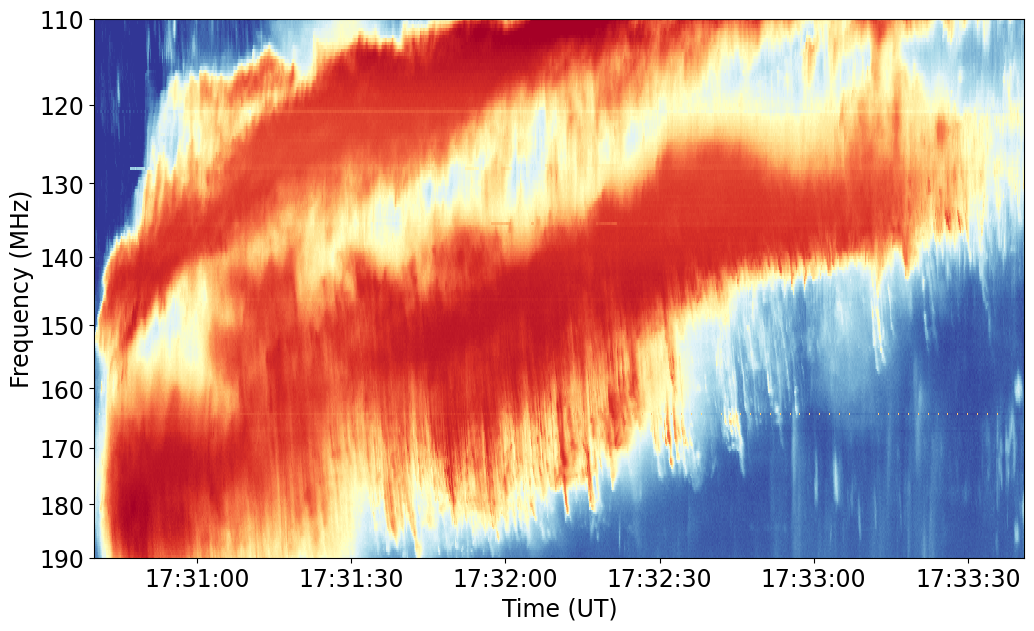

In [23]:
min_range = -0.5
max_range = 2.5

fig = plt.figure(figsize=[12,7])
ax = fig.add_subplot(111)
ax.pcolormesh(herring_mode3.index, herring_mode3.columns, herring_mode3.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(herring_mode5.index, herring_mode5.columns, herring_mode5.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(herring_mode7.index, herring_mode7.columns, herring_mode7.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.set_yscale('log')

# Define the custom ticks
custom_ticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
ax.set_yticks(custom_ticks)
ax.set_yticklabels([str(tick) for tick in custom_ticks], fontsize = 17)
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlabel('Time (UT)', fontsize = 17)
ax.set_ylabel('Frequency (MHz)', fontsize = 17)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.tick_params(axis='x', labelsize=17)
#ax.set_ylim(190, 35)
ax.set_ylim(190, 110)

#ax.set_ylim(max(ax.get_ylim()[::-1]), 35) original
plt.savefig(f"herring_1730.png")
#plt.show()

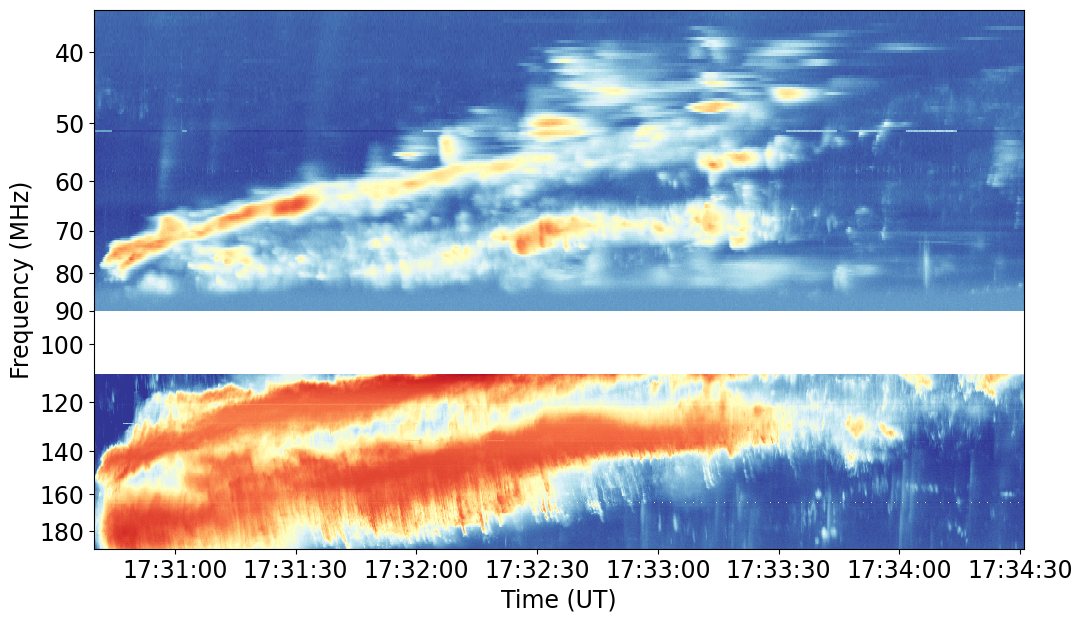

In [16]:
min_range = -0.5
max_range = 2.8

fig = plt.figure(figsize=[12,7])
ax = fig.add_subplot(111)
ax.pcolormesh(typeII_1_mode3.index, typeII_1_mode3.columns, typeII_1_mode3.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(typeII_1_mode5.index, typeII_1_mode5.columns, typeII_1_mode5.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(typeII_1_mode7.index, typeII_1_mode7.columns, typeII_1_mode7.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.set_yscale('log')

# Define the custom ticks
custom_ticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180]
ax.set_yticks(custom_ticks)
ax.set_yticklabels([str(tick) for tick in custom_ticks], fontsize = 17)
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlabel('Time (UT)', fontsize = 17)
ax.set_ylabel('Frequency (MHz)', fontsize = 17)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.tick_params(axis='x', labelsize=17)
ax.set_ylim(190, 35)
#ax.set_ylim(190, 110)

#ax.set_ylim(max(ax.get_ylim()[::-1]), 35) original
#plt.savefig(f"typeII_1730.png")
plt.show()

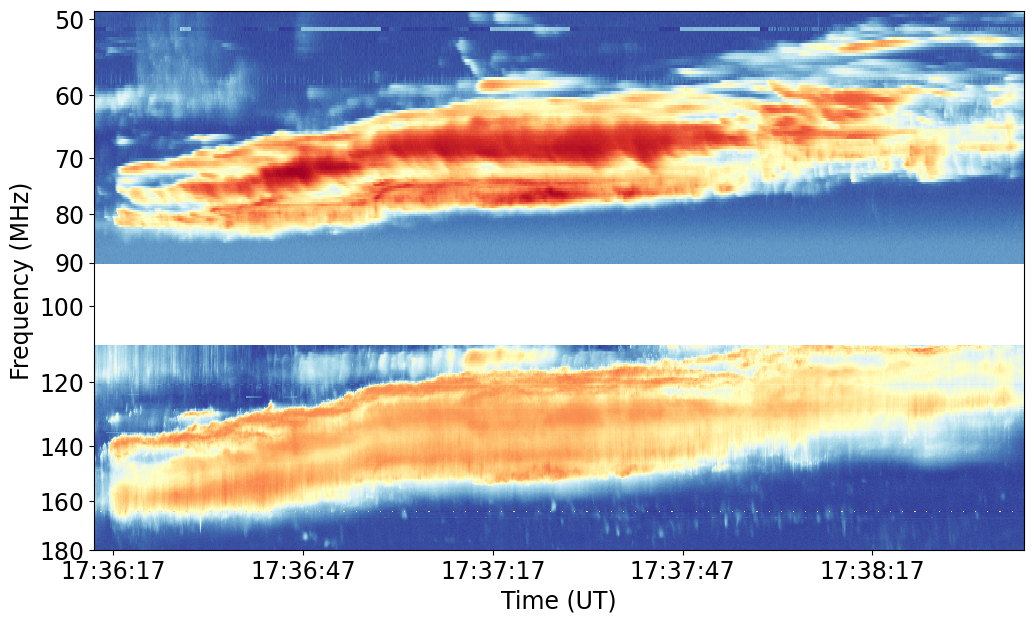

In [24]:
min_range = -0.5
max_range = 2.98

fig = plt.figure(figsize=[12,7])
ax = fig.add_subplot(111)
ax.pcolormesh(typeII_2_mode3.index, typeII_2_mode3.columns, typeII_2_mode3.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(typeII_2_mode5.index, typeII_2_mode5.columns, typeII_2_mode5.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(typeII_2_mode7.index, typeII_2_mode7.columns, typeII_2_mode7.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.set_yscale('log')

# Define the custom ticks
custom_ticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180]
ax.set_yticks(custom_ticks)
ax.set_yticklabels([str(tick) for tick in custom_ticks], fontsize = 17)
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlabel('Time (UT)', fontsize = 17)
ax.set_ylabel('Frequency (MHz)', fontsize = 17)
ax.xaxis_date()

ax.xaxis.set_major_locator(mdates.SecondLocator(interval=30))
# Define minor ticks every 2 minutes
#ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

ax.tick_params(axis='x', labelsize=17)
ax.set_ylim(180, 49)
#plt.show()
plt.savefig(f"typeII_1735.png")

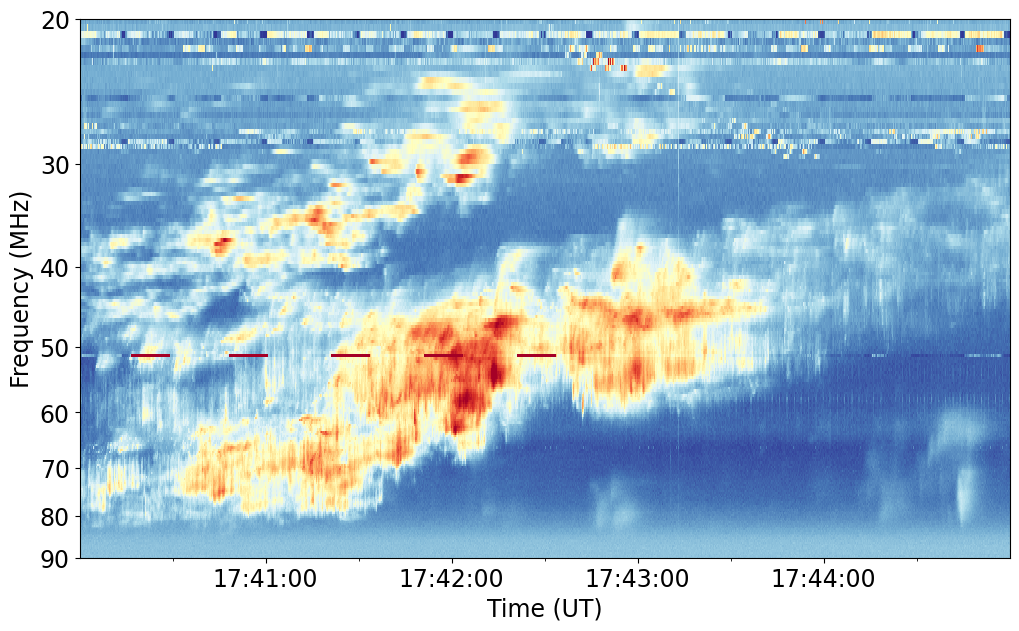

In [27]:
min_range = -0.5
max_range = 1.85

fig = plt.figure(figsize=[12,7])
ax = fig.add_subplot(111)
ax.pcolormesh(typeII_3_mode3.index, typeII_3_mode3.columns, typeII_3_mode3.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(typeII_3_mode5.index, typeII_3_mode5.columns, typeII_3_mode5.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(typeII_3_mode7.index, typeII_3_mode7.columns, typeII_3_mode7.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.set_yscale('log')

# Define the custom ticks
custom_ticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]
ax.set_yticks(custom_ticks)
ax.set_yticklabels([str(tick) for tick in custom_ticks], fontsize = 17)
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlabel('Time (UT)', fontsize = 17)
ax.set_ylabel('Frequency (MHz)', fontsize = 17)
ax.xaxis_date()

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
# Define minor ticks every 2 minutes
ax.xaxis.set_minor_locator(mdates.SecondLocator(interval=30))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.tick_params(axis='x', labelsize=17)
ax.set_ylim(90, 20)
#plt.show()
 plt.savefig(f"typeII_1740.png")

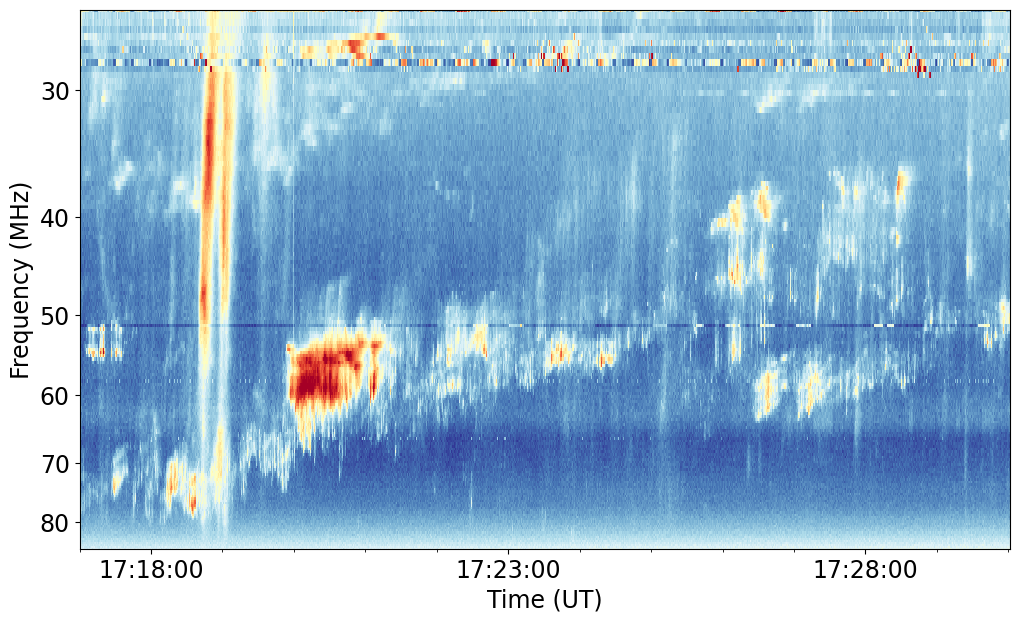

In [16]:
min_range = -0.5
max_range = 0.7

fig = plt.figure(figsize=[12,7])
ax = fig.add_subplot(111)
ax.pcolormesh(typeII_4_mode3.index, typeII_4_mode3.columns, typeII_4_mode3.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(typeII_4_mode5.index, typeII_4_mode5.columns, typeII_4_mode5.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(typeII_4_mode7.index, typeII_4_mode7.columns, typeII_4_mode7.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.set_yscale('log')

# Define the custom ticks
custom_ticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]
ax.set_yticks(custom_ticks)
ax.set_yticklabels([str(tick) for tick in custom_ticks], fontsize = 17)
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlabel('Time (UT)', fontsize = 17)
ax.set_ylabel('Frequency (MHz)', fontsize = 17)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
# Define minor ticks every 2 minutes
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

ax.tick_params(axis='x', labelsize=17)
ax.set_ylim(85, 25)
#plt.show()
plt.savefig(f"typeII_1717.png")

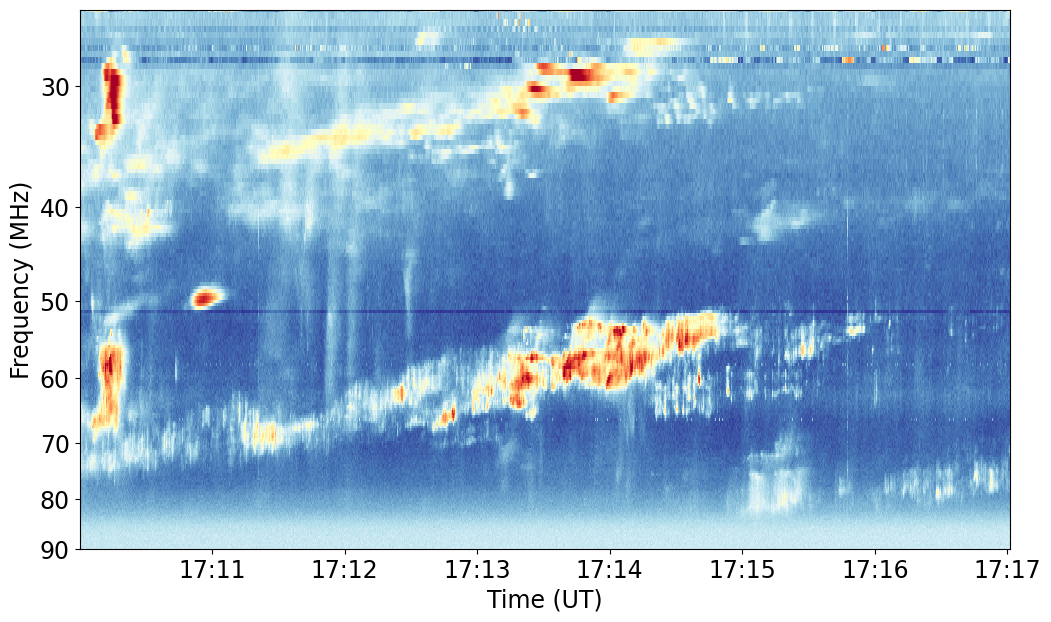

In [37]:
min_range = -0.5
max_range = .9

fig = plt.figure(figsize=[12,7])
ax = fig.add_subplot(111)
ax.pcolormesh(typeII_5_mode3.index, typeII_5_mode3.columns, typeII_5_mode3.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(typeII_5_mode5.index, typeII_5_mode5.columns, typeII_5_mode5.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(typeII_5_mode7.index, typeII_5_mode7.columns, typeII_5_mode7.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.set_yscale('log')

# Define the custom ticks
custom_ticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]
ax.set_yticks(custom_ticks)
ax.set_yticklabels([str(tick) for tick in custom_ticks], fontsize = 17)
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlabel('Time (UT)', fontsize = 17)
ax.set_ylabel('Frequency (MHz)', fontsize = 17)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.tick_params(axis='x', labelsize=17)
ax.set_ylim(90, 25)
#plt.show()
plt.savefig(f"typeII_1710.png")

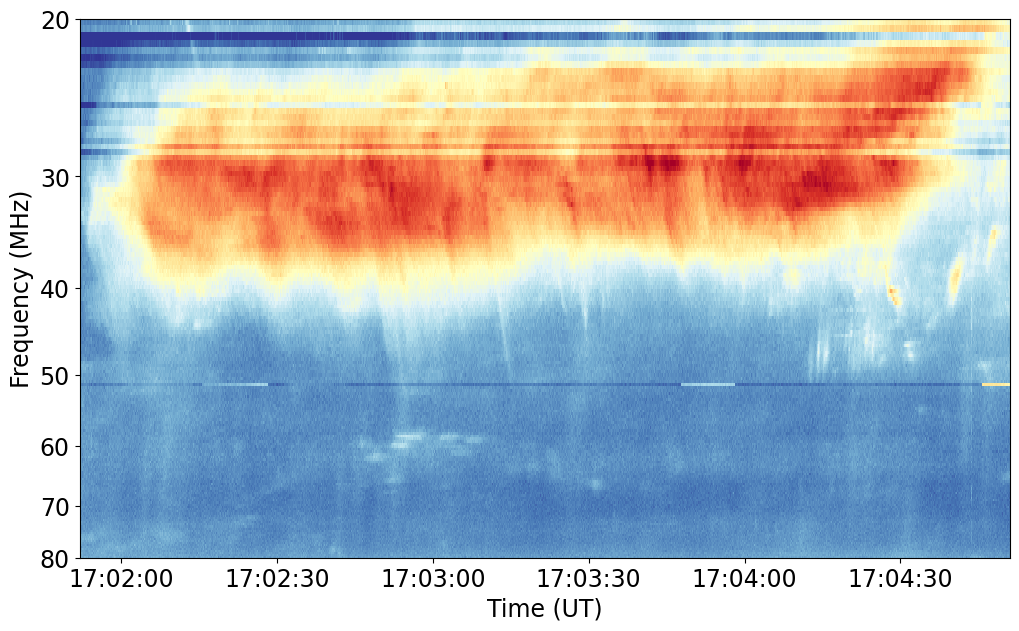

In [30]:
min_range = -0.5
max_range = 1.1

fig = plt.figure(figsize=[12,7])
ax = fig.add_subplot(111)
ax.pcolormesh(typeII_6_mode3.index, typeII_6_mode3.columns, typeII_6_mode3.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(typeII_6_mode5.index, typeII_6_mode5.columns, typeII_6_mode5.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(typeII_6_mode7.index, typeII_6_mode7.columns, typeII_6_mode7.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.set_yscale('log')

# Define the custom ticks
custom_ticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]
ax.set_yticks(custom_ticks)
ax.set_yticklabels([str(tick) for tick in custom_ticks], fontsize=17)
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlabel('Time (UT)', fontsize = 17)
ax.set_ylabel('Frequency (MHz)', fontsize = 17)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.tick_params(axis='x', labelsize=17)
ax.set_ylim(80, 20)
#plt.show()
plt.savefig(f"typeII_1702.png")

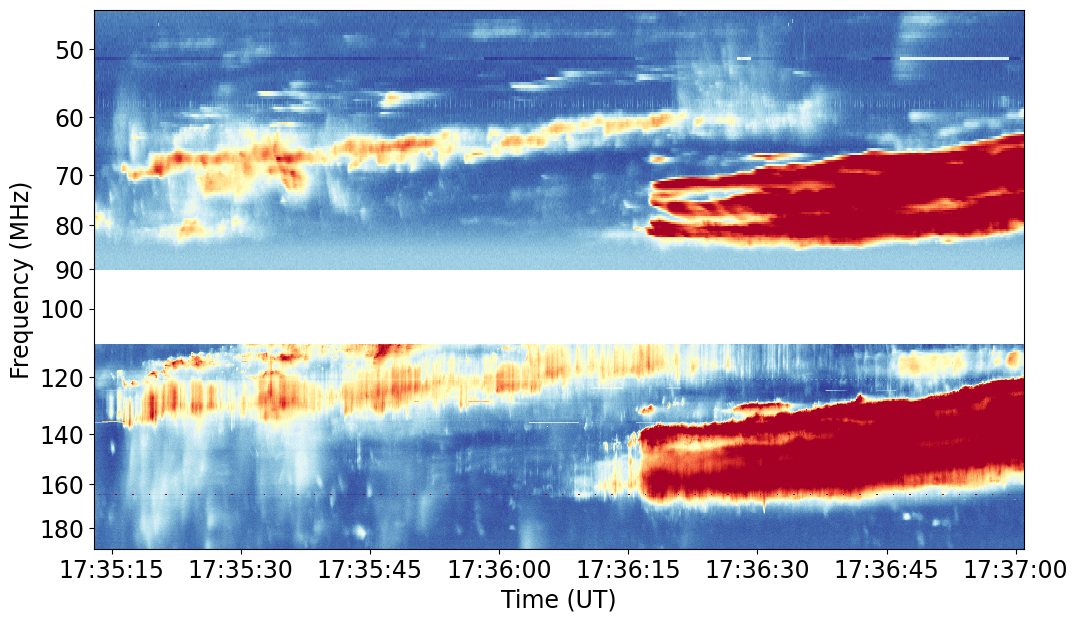

In [33]:
min_range = -0.5
max_range = 1.55

fig = plt.figure(figsize=[12,7])
ax = fig.add_subplot(111)
ax.pcolormesh(typeII_7_mode3.index, typeII_7_mode3.columns, typeII_7_mode3.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(typeII_7_mode5.index, typeII_7_mode5.columns, typeII_7_mode5.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(typeII_7_mode7.index, typeII_7_mode7.columns, typeII_7_mode7.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.set_yscale('log')

# Define the custom ticks
custom_ticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]
ax.set_yticks(custom_ticks)
ax.set_yticklabels([str(tick) for tick in custom_ticks], fontsize = 17)
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlabel('Time (UT)', fontsize = 17)
ax.set_ylabel('Frequency (MHz)', fontsize = 17)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.tick_params(axis='x', labelsize=17)
ax.set_ylim(190, 45)
#plt.show()
plt.savefig(f"typeII_1734.png")

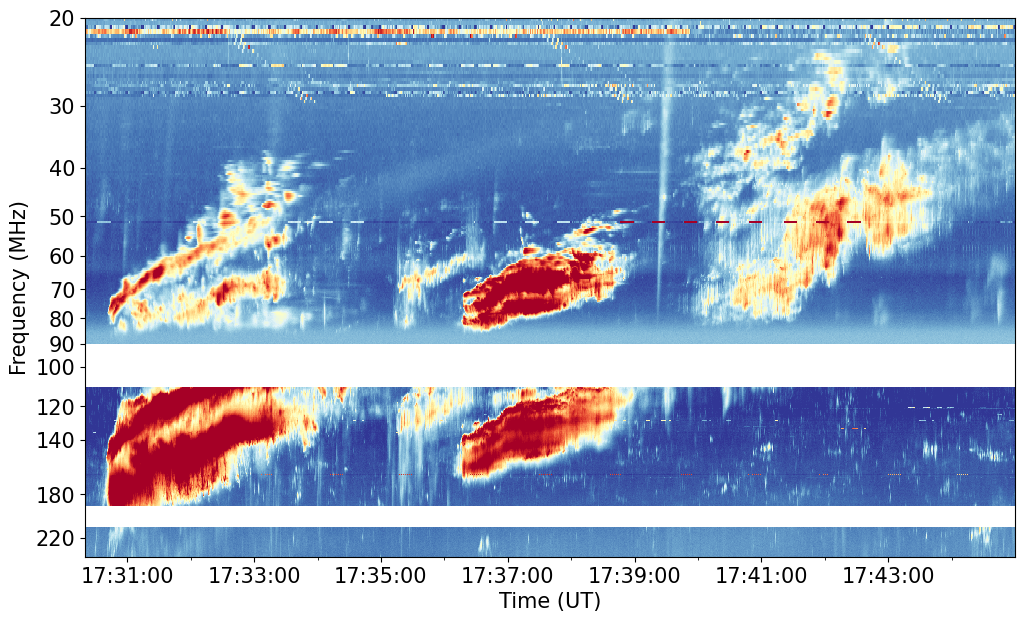

In [11]:
min_range = -0.5
max_range = 1.9

fig = plt.figure(figsize=[12,7])
ax = fig.add_subplot(111)
ax.pcolormesh(CME_2_mode3.index, CME_2_mode3.columns, CME_2_mode3.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(CME_2_mode5.index, CME_2_mode5.columns, CME_2_mode5.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(CME_2_mode7.index, CME_2_mode7.columns, CME_2_mode7.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.set_yscale('log')

# Define the custom ticks
custom_ticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 180, 220]
ax.set_yticks(custom_ticks)
ax.set_yticklabels([str(tick) for tick in custom_ticks], fontsize = 15)
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.set_xlabel('Time (UT)', fontsize = 15)
ax.set_ylabel('Frequency (MHz)', fontsize = 15)
ax.xaxis_date()

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
# Define minor ticks every 2 minutes
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=1))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.tick_params(axis='x', labelsize=15)
ax.set_ylim(240, 20)
#plt.show()
plt.savefig(f"CME_2.png")

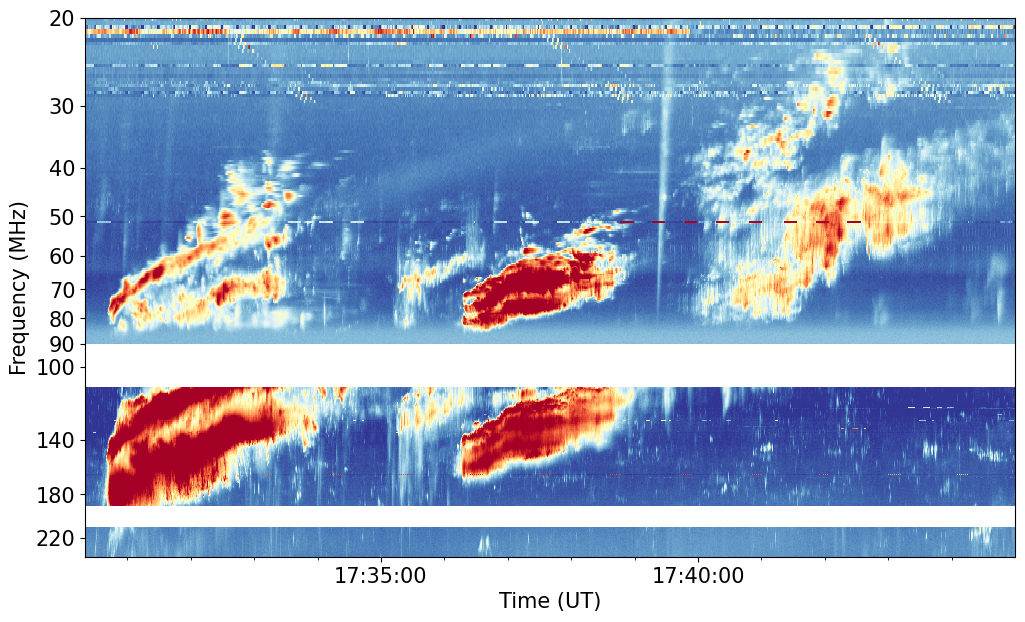

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

# Your existing data and configuration
min_range = -0.5
max_range = 1.9

fig = plt.figure(figsize=[12, 7])
ax = fig.add_subplot(111)
ax.pcolormesh(CME_2_mode3.index, CME_2_mode3.columns, CME_2_mode3.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(CME_2_mode5.index, CME_2_mode5.columns, CME_2_mode5.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.pcolormesh(CME_2_mode7.index, CME_2_mode7.columns, CME_2_mode7.values.T,
              vmin=min_range, vmax=max_range, cmap='RdYlBu_r')
ax.set_yscale('log')

# Define the custom y-ticks
custom_ticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 140, 180, 220]
ax.set_yticks(custom_ticks)
ax.set_yticklabels([str(tick) for tick in custom_ticks], fontsize=15)
ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))

# Increase the number of x-ticks
# Define major ticks every 10 minutes
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
# Define minor ticks every 2 minutes
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

ax.set_xlabel('Time (UT)', fontsize=15)
ax.set_ylabel('Frequency (MHz)', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.set_ylim(240, 20)
#plt.savefig(f"CME_2.png")
plt.show()

In [ ]:
def newkirk_h(r):
     """
#     Newkirk electron-density model; harmonic emission.
#     e.g. `fold` is a multiplicative factor to change the density scaling.
#     """
     fold = 2.5
     model = fold*4.2e4*10**(4.32/r)
     return model

In [ ]:
E0 = 
me = 
qe = 

def freq_to_R(f_pe, ne_r):
    n = (f_pe**2)*E0*me/qe
     n
    return R

In [ ]:
# # Hz
freq = 40*1e6 # --> MHz
print(f'Assuming fundamental emission:\t{freq_to_R(f_pe=freq, ne_r=newkirk_h)[0]:.2f} Rs')
print(f'Assuming harmonic emission:\t{freq_to_R(f_pe=(freq/2), ne_r=newkirk_h)[0]:.2f} Rs')

# # calc the height from Newkirk model, in Rs 
rmodel = freq_to_R(f_pe=(freqs[i]/2)*1e6, ne_r=newkirk_h)[0]

# # calc the height on the plane of sky (POS), in Rs
rpos = np.sqrt(xshift**2 + yshift**2)

# ### +Z Solution

# # calc the distance from the POS, in Rs
zshift = np.sqrt(rmodel**2 - rpos**2)